In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
wine = pd.read_csv('./datasets/winequality_merged.csv')

# replace spaces in column names and convert all columns to lowercase:
wine.columns = [x.lower().replace(' ','_') for x in wine.columns]

In [3]:
wine.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality,red_wine
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


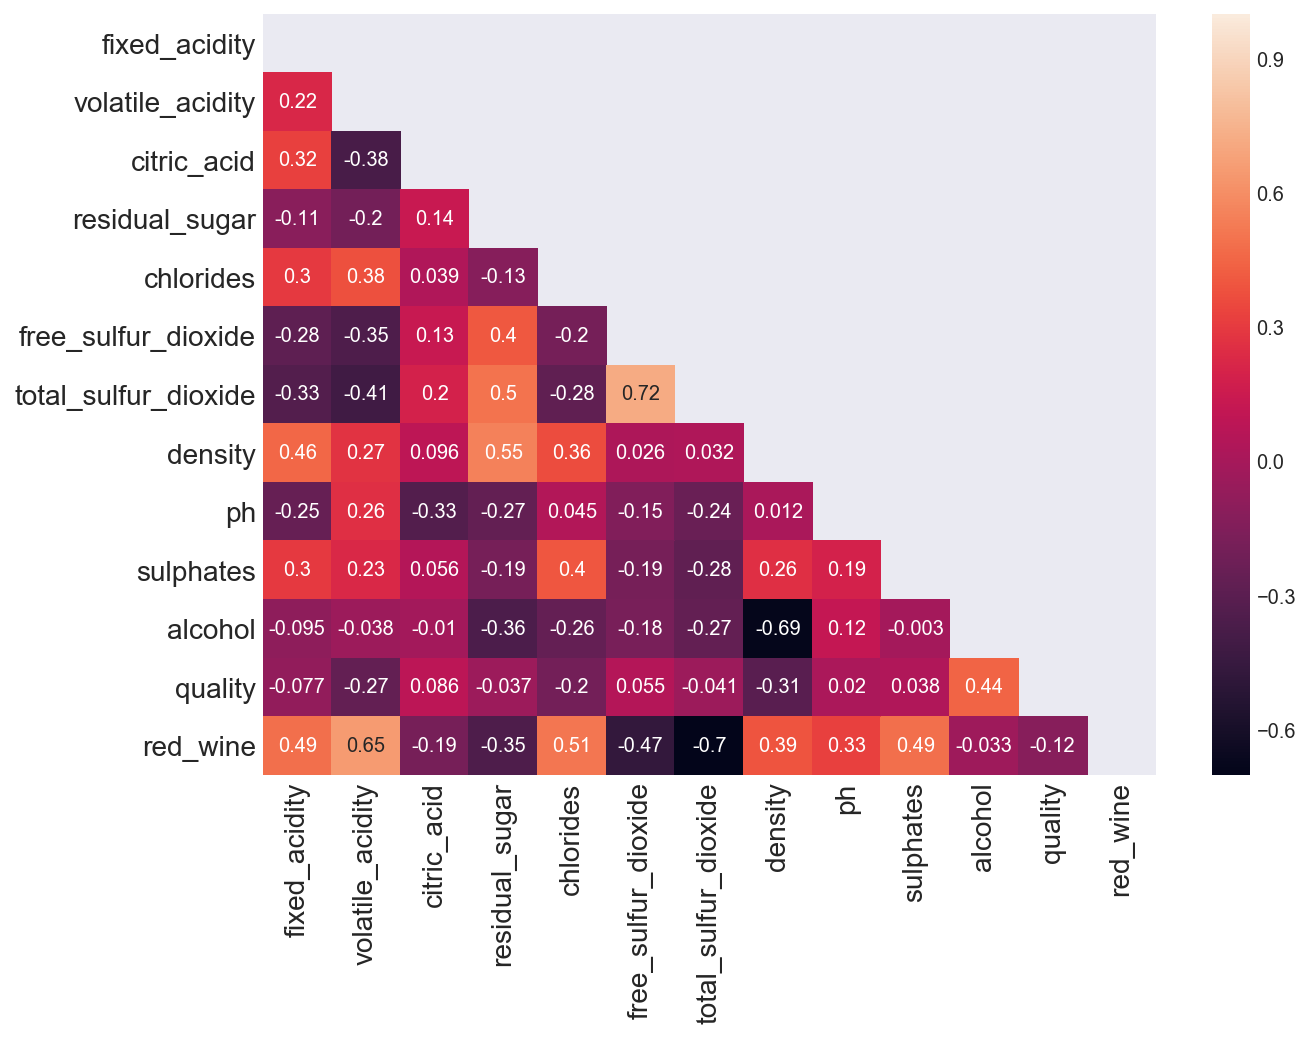

In [7]:
fig, ax = plt.subplots(figsize = (10,7))
mask = np.zeros_like(wine.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Plot the heatmap with seaborn.
# Assign the matplotlib axis the function returns. This will let us resize the labels.
ax = sns.heatmap(wine.corr(), mask=mask, ax=ax, annot = True)

# Resize the labels.
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14)

# If you put plt.show() at the bottom, it prevents those useless printouts from matplotlib.
plt.show()

In [8]:
target = 'red_wine'

In [23]:
X = wine[['fixed_acidity', 'volatile_acidity', 'chlorides', 'free_sulfur_dioxide','total_sulfur_dioxide','density','sulphates']]
y = wine['red_wine']

In [28]:
X.shape

(6497, 7)

In [29]:
y.shape

(6497,)

In [34]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [35]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)


# build a linear regression model
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

# examine the coefficients
print linreg.coef_

# make predictions
y_pred = linreg.predict(X_test)

[ 0.04350998  0.13800621  0.03608744  0.04857205 -0.24307568  0.0849601
  0.07194843]


In [36]:
# calculate RMSE
from sklearn import metrics
import numpy as np
print np.sqrt(metrics.mean_squared_error(y_test, y_pred))

0.201758877146


In [37]:
# alpha=0 is equivalent to linear regression
from sklearn.linear_model import Ridge
ridgereg = Ridge(alpha=0, normalize=True)
ridgereg.fit(X_train, y_train)
y_pred = ridgereg.predict(X_test)
print np.sqrt(metrics.mean_squared_error(y_test, y_pred))

0.201758877146


In [38]:
# try alpha=0.1
ridgereg = Ridge(alpha=0.1, normalize=True)
ridgereg.fit(X_train, y_train)
y_pred = ridgereg.predict(X_test)
print np.sqrt(metrics.mean_squared_error(y_test, y_pred))

0.201446181825


In [39]:
# examine the coefficients
print ridgereg.coef_

[ 0.04846266  0.1311863   0.04285961  0.01542081 -0.19832578  0.07392258
  0.07143461]


In [42]:
# create an array of alpha values
alpha_range = 10.**np.arange(-2, 3)
alpha_range

# select the best alpha with RidgeCV
from sklearn.linear_model import RidgeCV
ridgeregcv = RidgeCV(alphas=alpha_range, normalize=True, scoring='mean_squared_error')
ridgeregcv.fit(X_train, y_train)
ridgeregcv.alpha_

# predict method uses the best alpha value
y_pred = ridgeregcv.predict(X_test)
print np.sqrt(metrics.mean_squared_error(y_test, y_pred))

0.201440289737


/Users/timong/anaconda/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/timong/anaconda/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/timong/anaconda/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/timong/anaconda/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Use

In [44]:
# Lasso regression
# try alpha=0.001 and examine coefficients
from sklearn.linear_model import Lasso
lassoreg = Lasso(alpha=0.001, normalize=True)
lassoreg.fit(X_train, y_train)
print lassoreg.coef_

# try alpha=0.01 and examine coefficients
lassoreg = Lasso(alpha=0.0006, normalize=True)
lassoreg.fit(X_train, y_train)
print lassoreg.coef_

# calculate RMSE (for alpha=0.01)
y_pred = lassoreg.predict(X_test)
print np.sqrt(metrics.mean_squared_error(y_test, y_pred))

# select the best alpha with LassoCV
from sklearn.linear_model import LassoCV
lassoregcv = LassoCV(n_alphas=100, normalize=True, random_state=1)
lassoregcv.fit(X_train, y_train)
lassoregcv.alpha_

# examine the coefficients
print lassoregcv.coef_

# predict method uses the best alpha value
y_pred = lassoregcv.predict(X_test)
print np.sqrt(metrics.mean_squared_error(y_test, y_pred))

[ 0.02232121  0.11094097  0.02116791 -0.         -0.16628503  0.04351707
  0.04421474]
[ 0.02931735  0.12030964  0.02762979 -0.         -0.18369818  0.06076146
  0.05591945]
0.21086791787
[ 0.04334748  0.13782143  0.03603858  0.04745646 -0.2421212   0.0848105
  0.07185841]
0.201716573541
